In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv("/content/drive/My Drive/IS460/credit_train.csv")

Mounted at /content/drive/


**Part 1: Data Cleaning**

In [ ]:
#Dropping IDs as they are not just for identification purposes only
data.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)
#Dropping Months since last delinquent has it has 50% missing values
data.drop(columns = 'Months since last delinquent', axis=1, inplace=True)
#Dropping 514 entries in the tail as it is all NAN
data.drop(data.tail(514).index, inplace=True) 

In [ ]:
#Encoding Categorial Variables
le = LabelEncoder()
data['Term']=le.fit_transform(data['Term'])
data['Years in current job']=le.fit_transform(data['Years in current job'])
data['Home Ownership']=le.fit_transform(data['Home Ownership'])
data['Purpose']=le.fit_transform(data['Purpose'])
data['Loan Status']=le.fit_transform(data['Loan Status'])

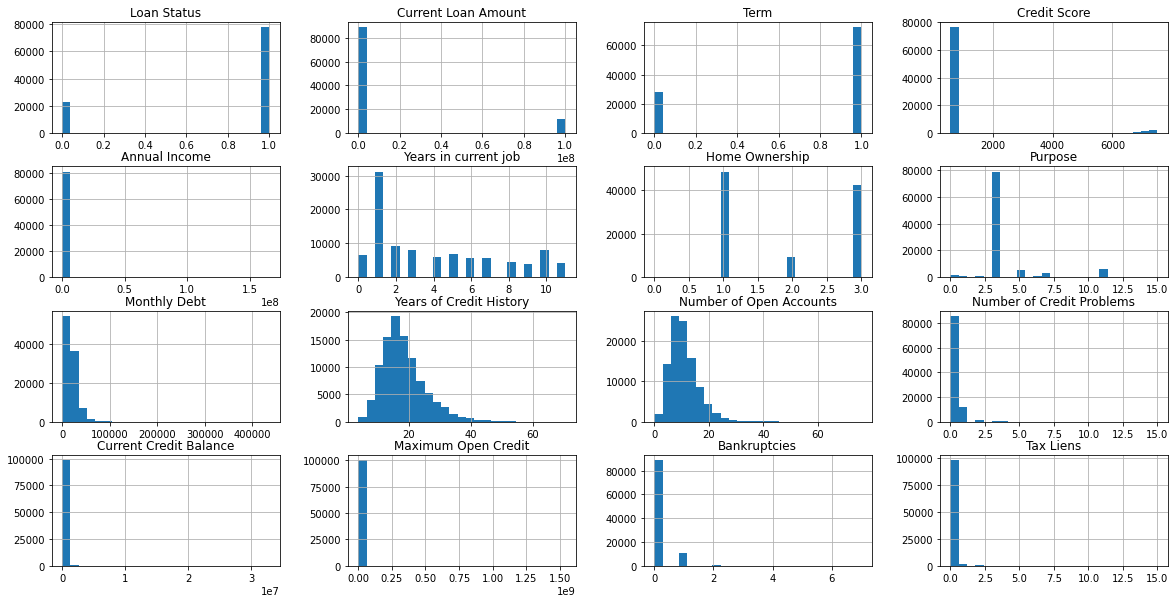

In [ ]:
data.hist(bins=25,figsize=(20,10));

In [ ]:
#Imputing missing variables

imputerl = SimpleImputer(strategy='median', missing_values=np.nan)
imputerl = imputerl.fit(data[['Credit Score']])
data['Credit Score'] = imputerl.transform(data[['Credit Score']])
imputer2 = SimpleImputer(strategy='median', missing_values=np.nan)
imputer2 = imputer2.fit(data[['Maximum Open Credit']])
data['Maximum Open Credit'] = imputer2.transform(data[['Maximum Open Credit']])
imputer3 = SimpleImputer(strategy='median', missing_values=np.nan)
imputer3 = imputer3.fit(data[['Annual Income']])
data['Annual Income'] = imputer3.transform(data[['Annual Income']])
imputer4 = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer4 = imputer4.fit(data[['Tax Liens']])
data['Tax Liens'] = imputer4.transform(data[['Tax Liens']])
imputer5 = SimpleImputer(strategy='median', missing_values=np.nan)
imputer5 = imputer5.fit(data[['Bankruptcies']])
data['Bankruptcies'] = imputer5.transform(data[['Bankruptcies']])
imputer6 = SimpleImputer(strategy='median', missing_values=np.nan) 
imputer6 = imputer6.fit(data[['Years in current job']])
data['Years in current job'] = imputer5.transform(data[['Years in current job']])

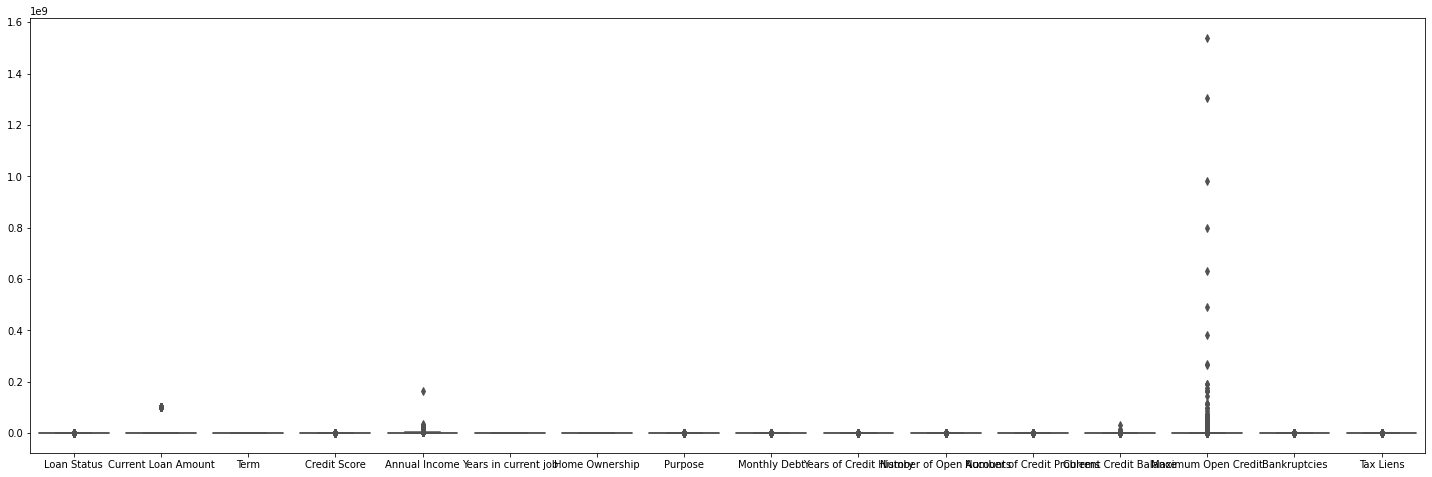

In [ ]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)


In [ ]:
#Removing outliers from annual income where income <0.25 or >0.75 of the dataset

# IQR
Q1 = np.percentile(data['Annual Income'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Annual Income'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", data.shape)

# Upper bound
upper = np.where(data['Annual Income'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['Annual Income'] <= (Q1-1.5*IQR))
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)

 
print("New Shape: ", data.shape)

Old Shape:  (100000, 16)
New Shape:  (93087, 16)


In [ ]:
#Fix Maximum Open Credit - remove outliers
data = data.drop(data[data['Maximum Open Credit']>7.1**8].index)



In [ ]:
data.to_csv("encoded_df.csv",index=False)